# How to use data on old districts to calculate weighted means for new districts

## Intro

I recently had to think of a way in which I could use data from old districts to apply to new districts, given that district borders changed in time.

Specifically, I have data for departmental roads (d_departamental) at a district level in Peru in 1975 and I would like to know how to use that data for 1993 in a way that makes sense.

One approach one could take is to calculate weighted average of departmental roads, where the weight is the area of the old districts that is now part of the new disticts. I will explain in the following steps how one could go about calculating this.

## Define your working directory

In [1]:
path = "C:\\Users\\bgpopescu\\Dropbox\\Education project\\Data\\Redistricting Exercise\\"

The basic files that we will work with are the following:
- Original PER_adm.gdb

## Import ArcGIS Library

In [2]:
# Import system modules
import sys, string, os, arcgisscripting
from IPython.display import Image

# Create the Geoprocessor object
gp = arcgisscripting.create()
print "created geoprocessor object"

# Check out any necessary licenses
gp.CheckOutExtension("spatial")
gp.CheckOutExtension("3D")
print "checked extensions"

#Turn overwrite on
gp.overwriteoutput = 1
print "overwrite on"

# Set Extent
gp.Extent = "MAXOF"

created geoprocessor object
checked extensions
overwrite on


## Examine Original geodatabase (optional)

We will work with district borders for 1975 (PER_adm3_1975) and district borders for 1993 (PER_adm3_1993). These are both polygon shapefiles.

In [3]:
arcpy.env.workspace = path + "Original PER_adm3.gdb"
fds=arcpy.ListFeatureClasses()
for fd in fds:
    print fd

PER_adm3_1993
PER_adm3_1975


The following set of commands allow us to automatically put several shape files within the same map.

In [4]:
mxd = arcpy.mapping.MapDocument(path + "Redistricting.mxd")

In [5]:
dataFrame = arcpy.mapping.ListDataFrames(mxd, "*")[0]

In [6]:
shp_List=arcpy.ListFeatureClasses()
for shp in shp_List:
    print shp

PER_adm3_1993
PER_adm3_1975


In [22]:
# Local variables:
pics = path

# Process: Create Folder
arcpy.CreateFolder_management(path, "pics")
print "Folder created"

# Local variables:
layer_folder = path

# Process: Create Folder
arcpy.CreateFolder_management(path, "layer_folder")
print "Folder created"

Folder created
Folder created


In [38]:
for layer in shp_List:
    outlayer = layer + "_lyr"
    layerfile = os.path.join(path + "layer_folder", layer + ".lyr")
    arcpy.MakeFeatureLayer_management(layer, outlayer)
    arcpy.SaveToLayerFile_management(outlayer, layerfile, "ABSOLUTE")
    addlayer = arcpy.mapping.Layer(layerfile)
    arcpy.mapping.AddLayer(dataFrame, addlayer, "BOTTOM")
    #The following commands are responsible for the zoom of the map
    #You may have to comment the following 4 lines out when running the first time.
    #Otherwise, it will give you an error.
    df = arcpy.mapping.ListDataFrames(mxd)[0]
    lyr = arcpy.mapping.ListLayers(mxd, 'PER_adm3*', df)[0]
    ext = lyr.getExtent()
    df.extent = ext
    arcpy.RefreshActiveView()
    
    arcpy.mapping.ExportToJPEG(mxd, "pics\\PER_adm_zoom1b")

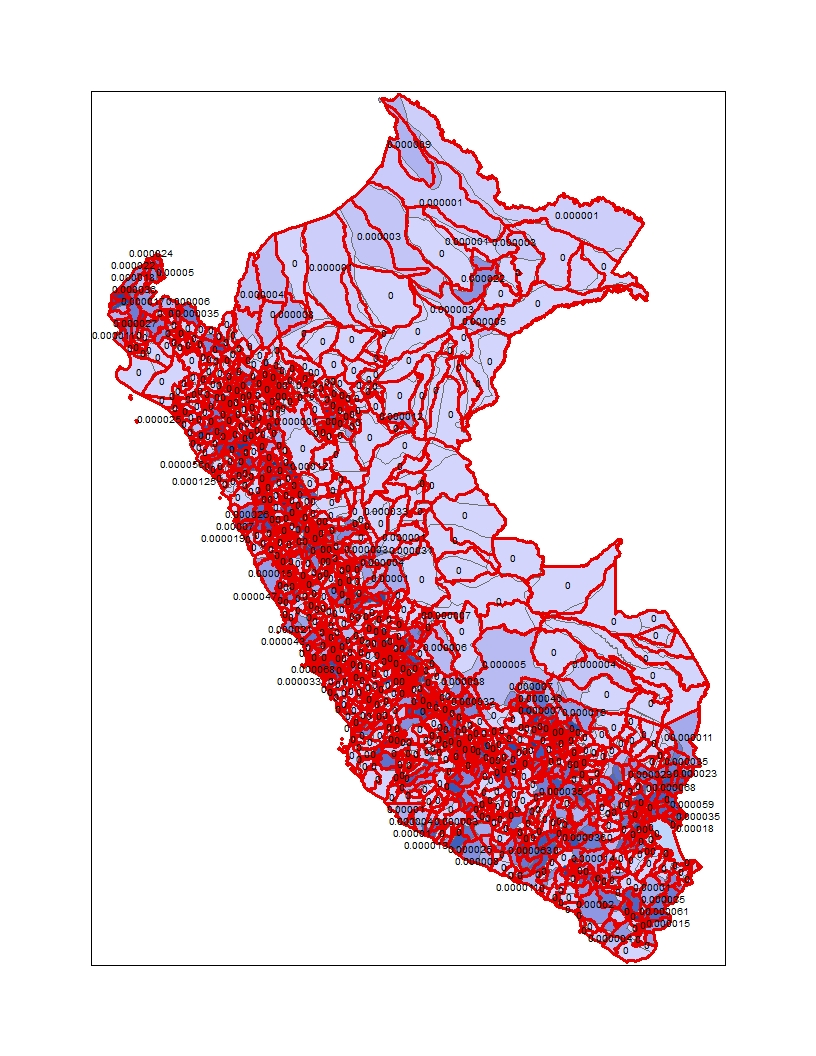

In [5]:
Image(path + "pics\\PER_adm_zoom1b.jpg")

In order to see better, I am zooming into a region (I created the maps manually):

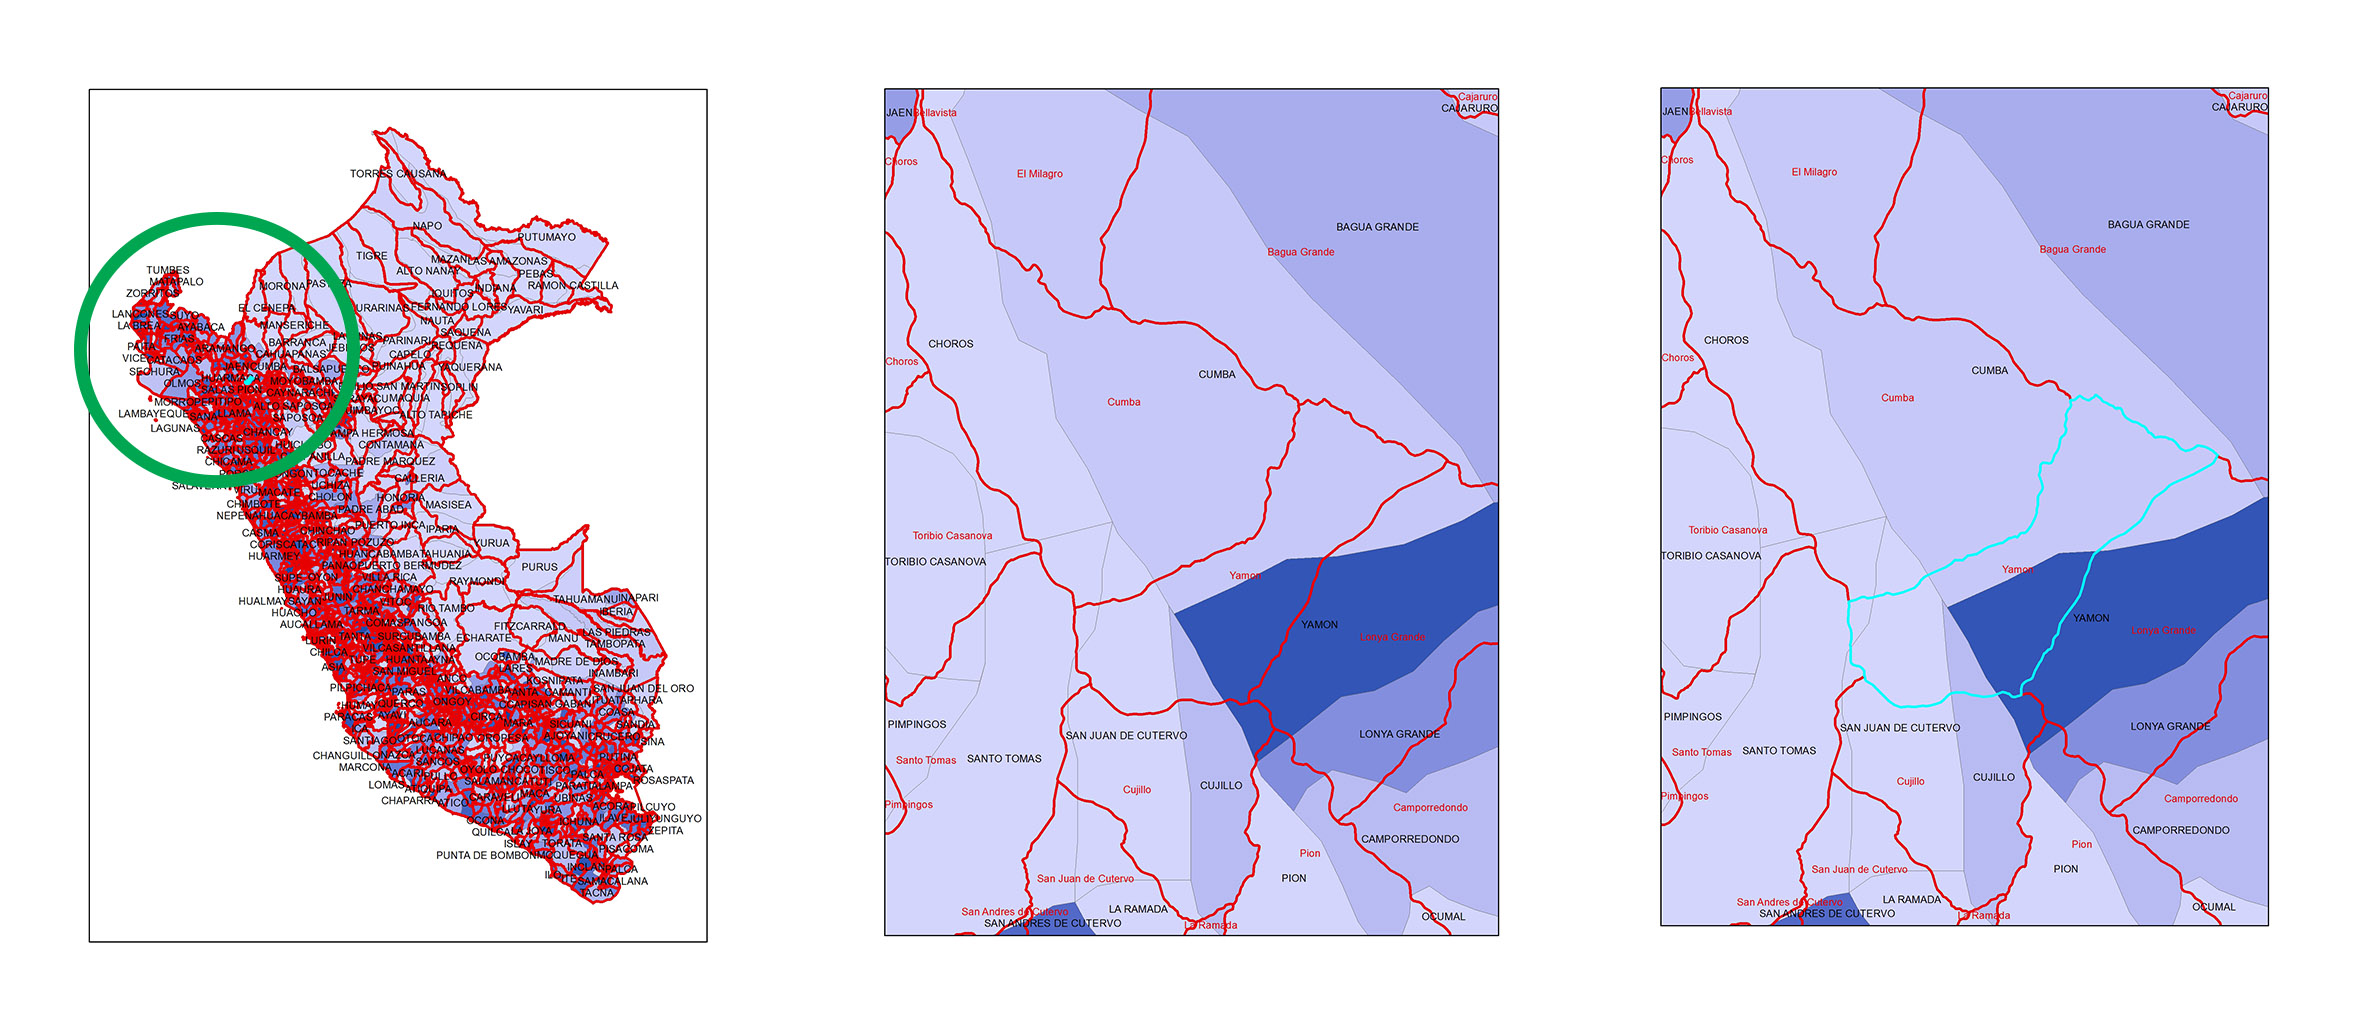

In [6]:
Image(path + "pics\\PER_adm.jpg")

A quick visual examination shows that  the district of Yamon of 1993 is made out of 5 districts that correspond to the 1975 administrative division:

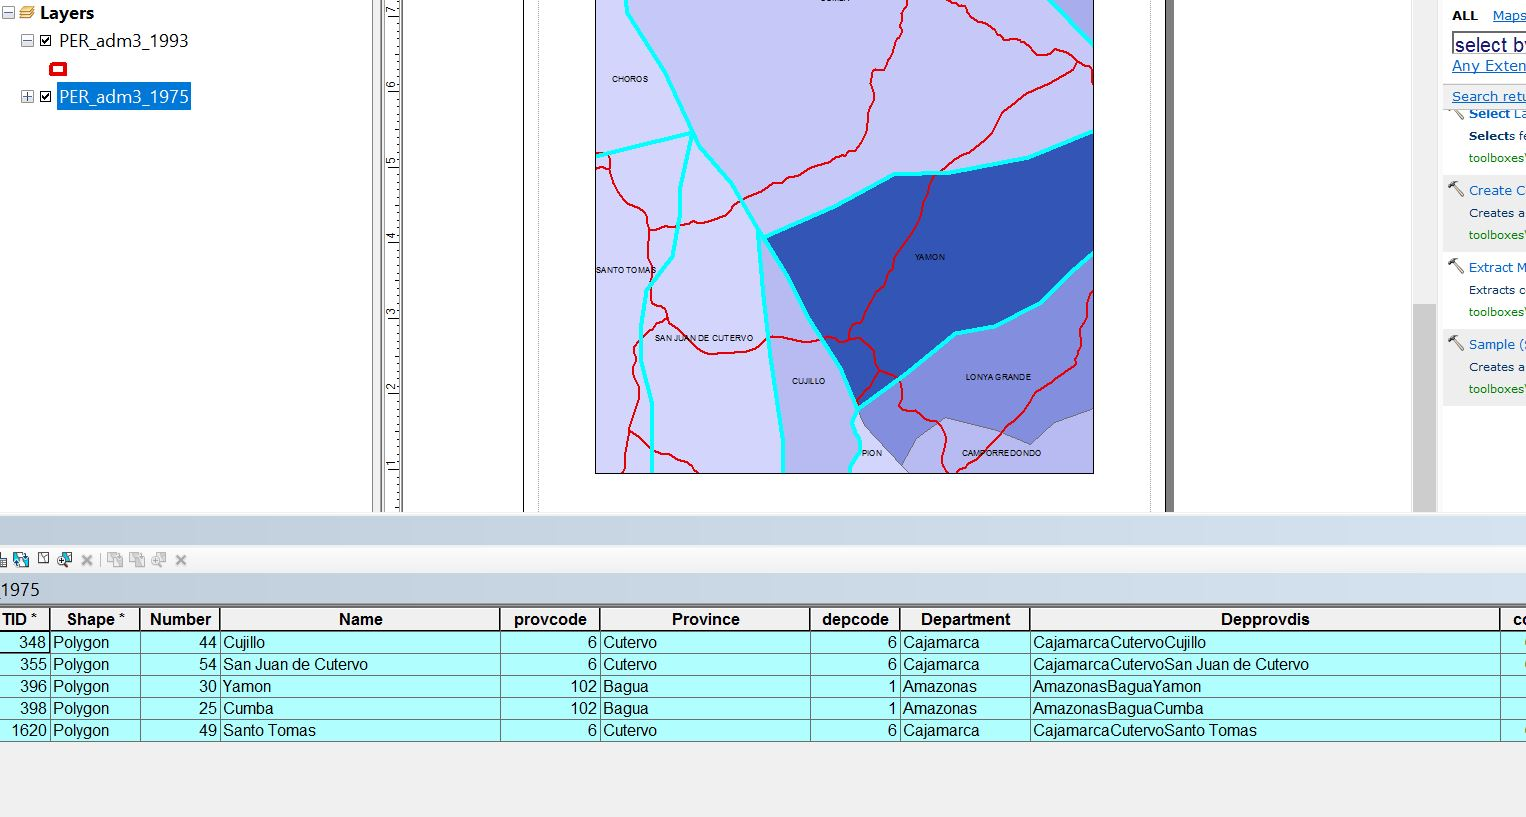

In [7]:
Image(path + "pics\\example.jpg")

# Step 0: Create Geodatabase

In [8]:
## Process: Create File GDB
PER_adm3 = path
PER_adm3_gdb = path + "PER_adm3"
arcpy.CreateFileGDB_management(PER_adm3, "PER_adm3.gdb", "CURRENT")
print "Geodatabse created"

Geodatabse created


# Step 1: Reproject the shape files

In [9]:
##Project shape files to WGS_1984_UTM_Zone_18N"
PER_adm3_1975 = path + "Original PER_adm3.gdb\PER_adm3_1975"
PER_adm3_1975__2_ = path + "PER_adm3.gdb\PER_adm3_1975"
PER_adm3_1993 = path + "Original PER_adm3.gdb\PER_adm3_1993"
PER_adm3_1993__2_ = path + "PER_adm3.gdb\PER_adm3_1993"

arcpy.Project_management(PER_adm3_1975, PER_adm3_1975__2_, "PROJCS['WGS_1984_UTM_Zone_18S',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',10000000.0],PARAMETER['Central_Meridian',-75.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
arcpy.Project_management(PER_adm3_1993, PER_adm3_1993__2_, "PROJCS['WGS_1984_UTM_Zone_18S',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Transverse_Mercator'],PARAMETER['False_Easting',500000.0],PARAMETER['False_Northing',10000000.0],PARAMETER['Central_Meridian',-75.0],PARAMETER['Scale_Factor',0.9996],PARAMETER['Latitude_Of_Origin',0.0],UNIT['Meter',1.0]]", "", "GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]]", "NO_PRESERVE_SHAPE", "", "NO_VERTICAL")
print "Projected shape files to WGS_1984_UTM_Zone_18N"

Projected shape files to WGS_1984_UTM_Zone_18N


# Step 2: Create unique incremental IDs

### PER_adm3_1975

In [10]:
# Local variables:
PER_adm3_1975 = path + "PER_adm3.gdb\\PER_adm3_1975"

# Process: Add Field
arcpy.AddField_management(PER_adm3_1975, "ID_1975", "LONG", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(PER_adm3_1975, "ID_1975", "autoIncrement()", "PYTHON_9.3", "rec=0\\ndef autoIncrement():\\n    global rec\\n    pStart = 1\\n    pInterval = 1\\n    if (rec == 0):\\n        rec = pStart\\n    else:\\n        rec += pInterval\\n    return rec")
print "Caculated field"

Caculated field


### PER_adm3_1993

In [11]:
# Local variables:
PER_adm3_1993 = path + "PER_adm3.gdb\\PER_adm3_1993"

# Process: Add Field
arcpy.AddField_management(PER_adm3_1993, "ID_1993", "LONG", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")

# Process: Calculate Field
arcpy.CalculateField_management(PER_adm3_1993, "ID_1993", "autoIncrement()", "PYTHON_9.3", "rec=0\\ndef autoIncrement():\\n    global rec\\n    pStart = 1\\n    pInterval = 1\\n    if (rec == 0):\\n        rec = pStart\\n    else:\\n        rec += pInterval\\n    return rec")
print "Caculated field"

Caculated field


# Step 3: Do an intersect analysis

The intersect analysis computes a geometric intersection of the input features. Features or portions of features which overlap in all layers and/or feature classes will be written to the output feature class.

In [12]:
# Local variables:
PER_adm3_1993 = "PER_adm3_1993"
PER_adm3_1975 = "PER_adm3_1975"
PER_adm3_intersect = path + "PER_adm3.gdb\\PER_adm3_intersect"

# Process: Intersect
arcpy.Intersect_analysis("PER_adm3_1993 #;PER_adm3_1975 #", PER_adm3_intersect, "ALL", "", "INPUT")
print "Intersect complete"

Intersect complete


A simple attribute selection on the newly created feature class - PER_adm3_intersect : "NAME_3 = 'Yamon'" reveals that the district Yamon that corresponds to the 1993 district border configuration is made out of 5 portions of districts that correspond to the 1995 district configuration. This is shown below:

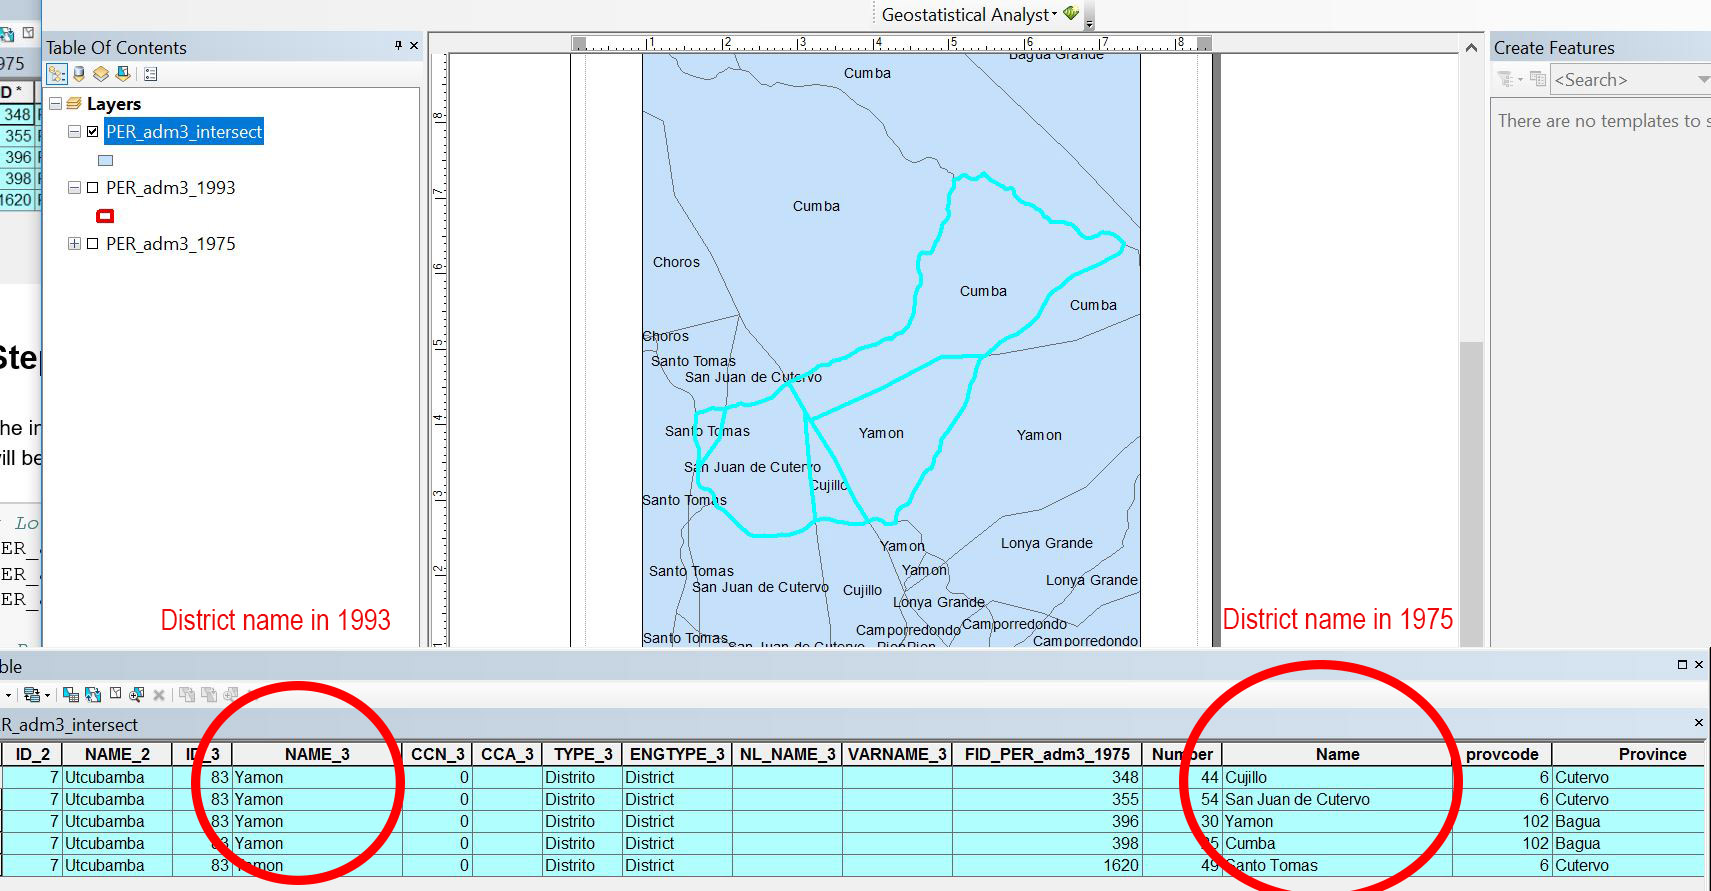

In [13]:
Image(path + "pics\\intersect2.jpg")

Therefore, the intersect analysis allows you to keep the attributes from both shape file.

# Step 4: Inspect the "Shape_Area" field that comes automatically with every polygon

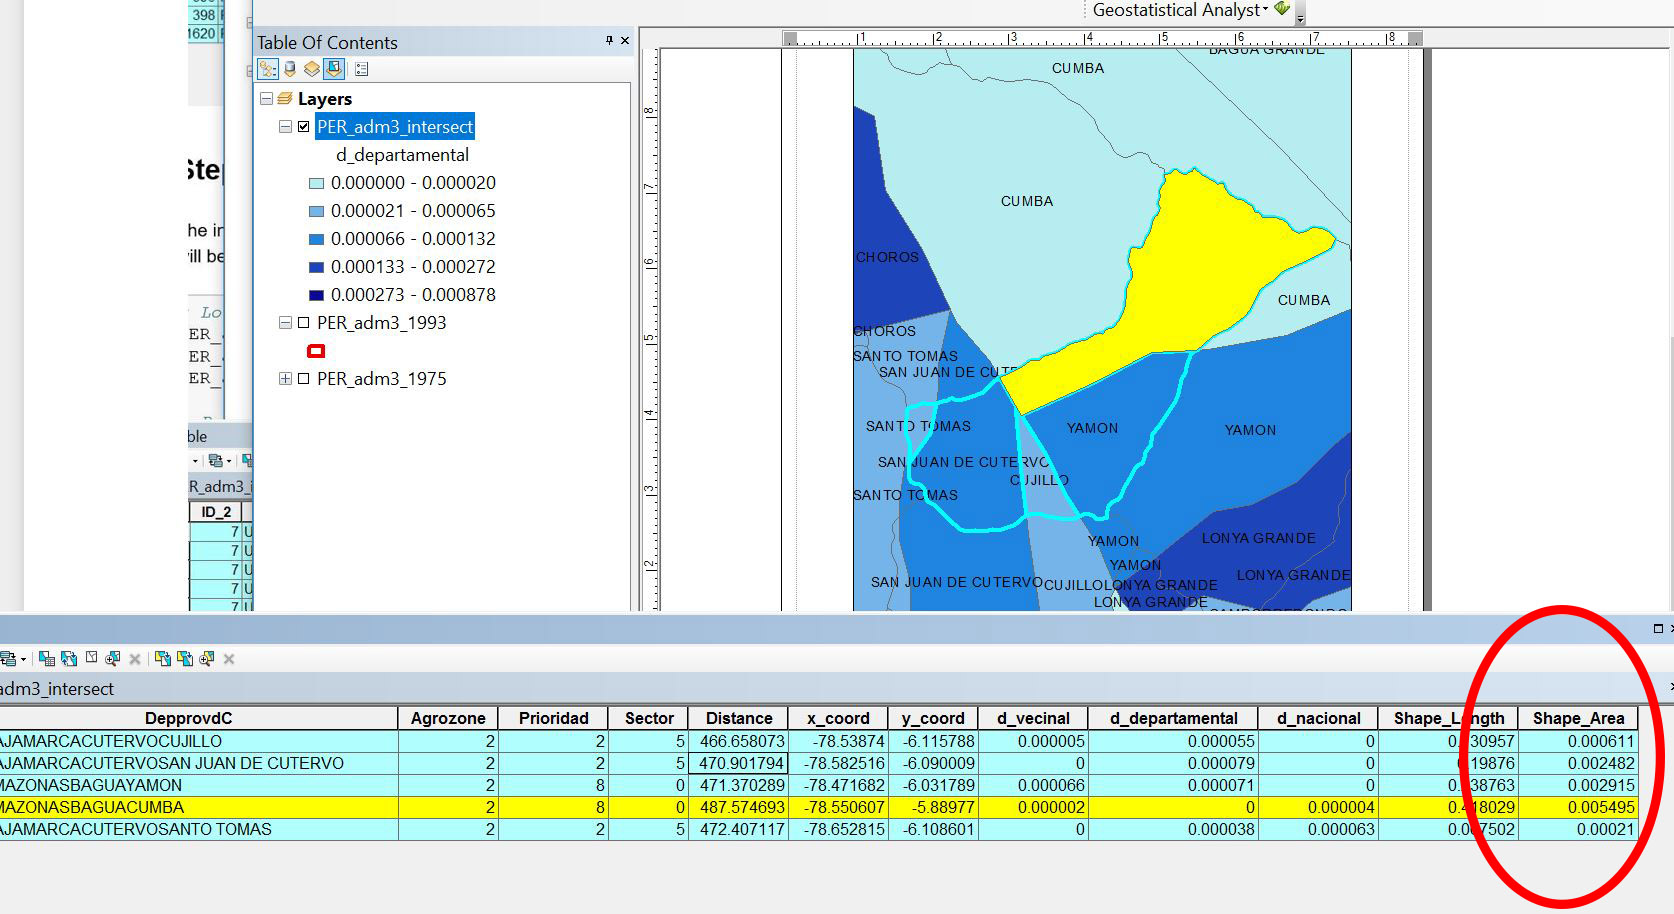

In [13]:
Image(path + "pics\\area2.jpg")

# Step 5: Calculate a weighted mean of density departmental roads

We will use the typical formula for calculating weighted means:

\begin{equation*}
\bar{x}=\frac{\sum_{i=1}^{n}(x_{i} * w_{i})}{\sum_{i=1}^{n}w_{i}}
\end{equation*}

"d_departamental" is density of departmental roads.

In [14]:
#We create a new field name where the weighted average will be calculated.
#Make sure that you add this field to the intersect shape file that was computed earlier.
#Make sure that the new field is "DOUBLE" and not "LONG" or "SHORT". This will allows you to have decimals.
# Local variables:
PER_adm3_intersect = path + "PER_adm3.gdb\\PER_adm3_intersect"

# Process: Add Field
arcpy.AddField_management(PER_adm3_intersect, "w_avg", "DOUBLE", "", "", "", "", "NULLABLE", "NON_REQUIRED", "")
print "Added field"

Added field


In [15]:
SC = path + "PER_adm3.gdb\\PER_adm3_intersect"
where = "ID_1993"
# The SearchCursor with list comprehension to return a
# unique set of values in the specified field
# This will give you all the unique values in ID_1993
# There will be repeated valued because districts from 1975
# correspond to various districts in 1993, as shown above
values = [row[0] for row in arcpy.da.SearchCursor(SC, (where))]
uniqueValues = set(values)
print(uniqueValues)

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [17]:
select = ('Shape_Area', 'd_departamental', 'w_avg')

Unfortunately the followig block of code seems to be taking a lot of time (i.e. For all districts, I needed about 15 mins, using a Macbook (dualboot) 2016.) I could not find any more efficient way to compute this. 

Optional:
If you want to see how the block works, type in at the beginning of the following block of code "for i in range(1, 5):" and then indent the entire block of code that follows. This will calculate only districst 1 through 5. You can change 5 to whatever number.

In [18]:
#for i in range(1, 5): 
for i in uniqueValues:
    if i-1 % 50 == 0:
        print("Working with #{}.".format(i))
    where_c = '"ID_1993" = {}'.format(i)
    rows = arcpy.da.SearchCursor(SC, select, where_clause=where_c)

    # to calculate for only one department
    tot_area = 0
    area_x_d_departamental = 0
    for row in rows:
        # define prettier names
        shape_area = row[0]
        d_departamental = row[1]

        # keep track of sums
        tot_area += shape_area
        try: #This is to deal with NULL values. Some districts have NULLS for d_departamental
            area_x_d_departamental += shape_area*d_departamental
        except:
            area_x_d_departamental += 0

    w_avg = area_x_d_departamental / tot_area

    # update w_avg value
    rows = arcpy.da.UpdateCursor(SC, select, where_clause=where_c)
    for row in rows:
        row[2] = w_avg
        rows.updateRow(row)

Working with #1.


# Step 6: Join the calculated weighted mean to the district shape file for 1993

In [26]:
#Perform the join field
# Local variables:
PER_adm3_1993 = path + "PER_adm3.gdb\\PER_adm3_1993"
PER_adm3_intersect = path + "PER_adm3.gdb\\PER_adm3_intersect"

# Process: Join Field
arcpy.JoinField_management(PER_adm3_1993, "ID_1993", PER_adm3_intersect, "ID_1993", "w_avg")
print "Joined tables"

Joined tables


# Step 7: Inspect the final outcome

In the attribute table for PER_adm3_1993, you should now see the w_avg variable, which we calculated in the previous steps.

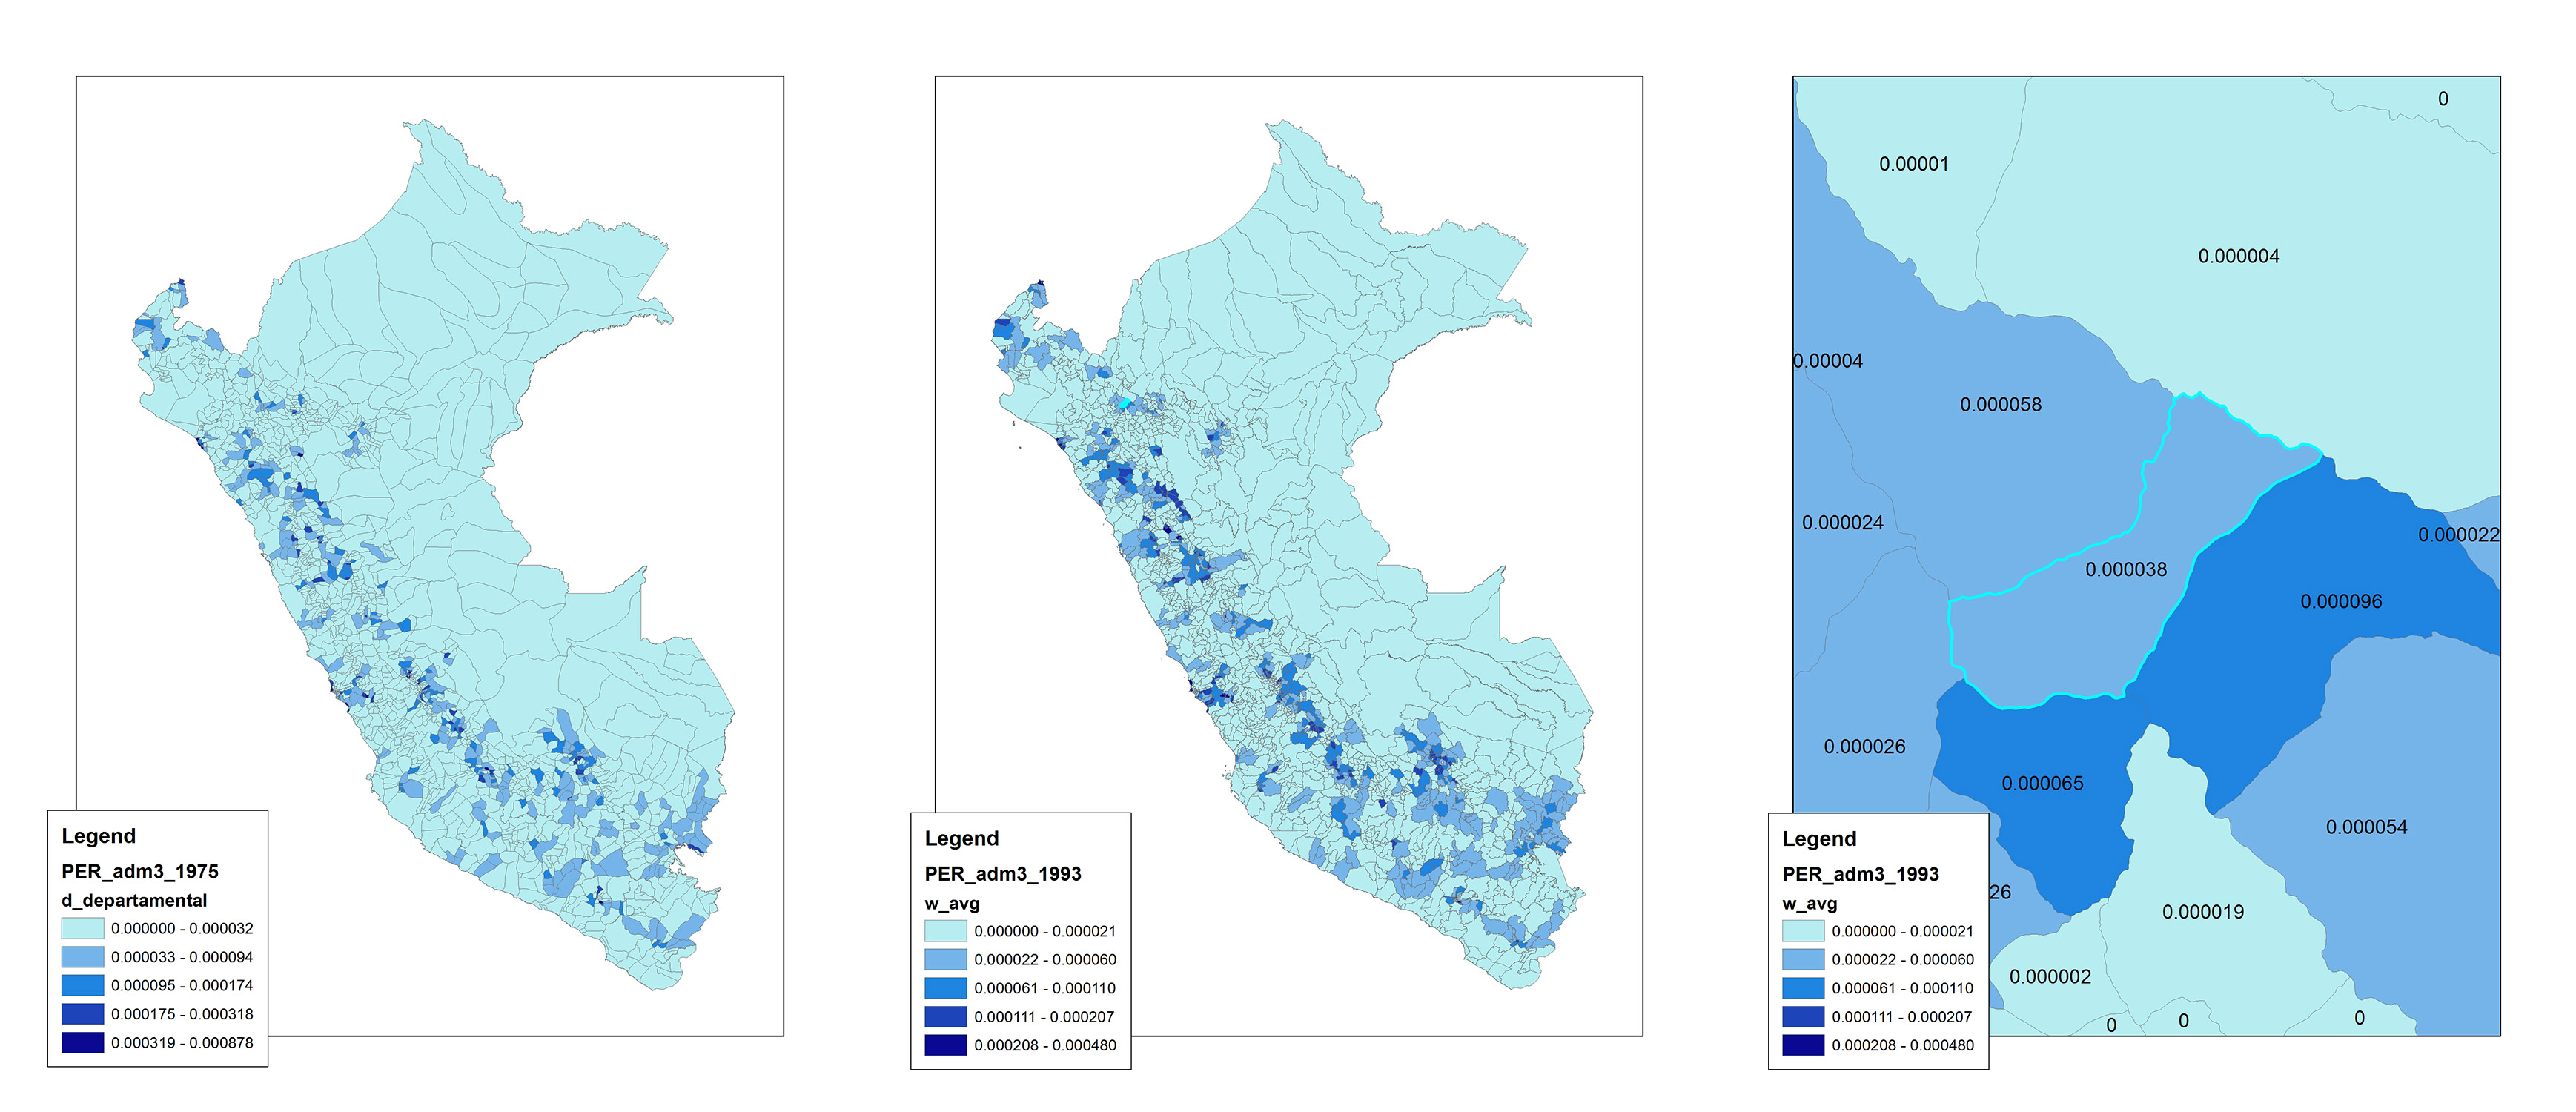

In [30]:
Image(path + "pics\\result4.jpg")

Remember that the district of Yamon of 1993 was made out of 5 districts. The calculations shown below confirm that the value of 0.000038, corresponding to the district of Yamon, selected in the map above is actually correct.

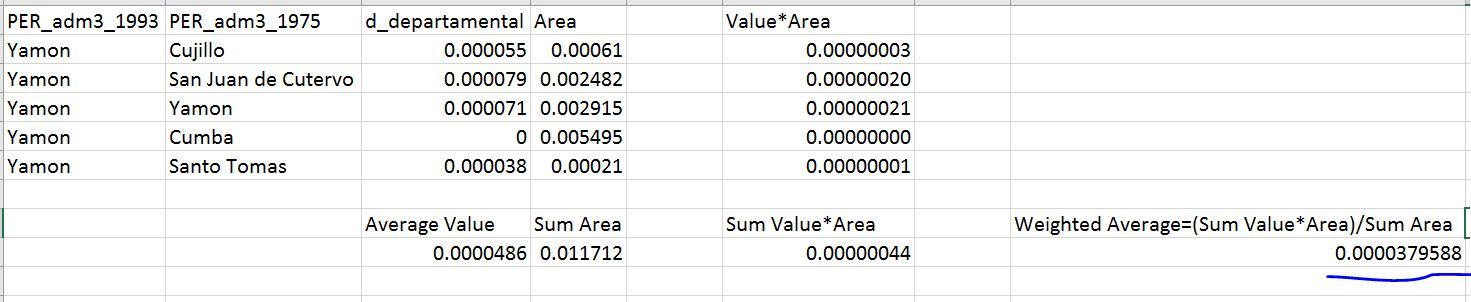

In [29]:
Image(path + "pics\\check.jpg")